In [2]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [5]:
df = pd.read_csv('data/emails.csv', sep=",")
# Creating the individual splits
df = df.drop(columns=df.columns[0])
fold1_train = df.iloc[:1000, :]
fold1_test = df.iloc[1000:, :]
fold2_train = df.iloc[1000:2000, :]
fold2_test = pd.concat([df.iloc[:1000, :], df.iloc[2000:, :]])
fold3_train = df.iloc[2000:3000, :]
fold3_test = fold2_test = pd.concat([df.iloc[:2000, :], df.iloc[3000:, :]])
fold4_train = df.iloc[3000:4000, :]
fold4_test = fold2_test = pd.concat([df.iloc[:3000, :], df.iloc[4000:, :]])
fold5_train = df.iloc[4000:5000, :]
fold5_test = df.iloc[:3000, :]

for i in [1,3,5,7,10]:
    var = 0
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold1_train.iloc[:, :-1], fold1_train.iloc[:, -1])
    y_pred = neigh.predict(fold1_test.iloc[:, :-1])
    var = var + accuracy_score(fold1_test.iloc[:, -1], y_pred)
    print("1.Accuracy: " + str(accuracy_score(fold1_test.iloc[:, -1], y_pred)))
    print("1.Precision: " + str(precision_score(fold1_test.iloc[:, -1], y_pred, average='binary')))
    print("1.Recall: " + str(recall_score(fold1_test.iloc[:, -1], y_pred, average='binary')))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold2_train.iloc[:, :-1], fold2_train.iloc[:, -1])
    y_pred = neigh.predict(fold2_test.iloc[:, :-1])
    var = var + accuracy_score(fold2_test.iloc[:, -1], y_pred)
    print("2.Accuracy: " + str(accuracy_score(fold2_test.iloc[:, -1], y_pred)))
    print("2.Precision: " + str(precision_score(fold2_test.iloc[:, -1], y_pred, average='binary')))
    print("2.Recall: " + str(recall_score(fold2_test.iloc[:, -1], y_pred, average='binary')))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold3_train.iloc[:, :-1], fold3_train.iloc[:, -1])
    y_pred = neigh.predict(fold3_test.iloc[:, :-1])
    var = var + accuracy_score(fold3_test.iloc[:, -1], y_pred)
    print("3.Accuracy: " + str(accuracy_score(fold3_test.iloc[:, -1], y_pred)))
    print("3.Precision: " + str(precision_score(fold3_test.iloc[:, -1], y_pred, average='binary')))
    print("3.Recall: " + str(recall_score(fold3_test.iloc[:, -1], y_pred, average='binary')))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold4_train.iloc[:, :-1], fold4_train.iloc[:, -1])
    y_pred = neigh.predict(fold4_test.iloc[:, :-1])
    var = var + accuracy_score(fold4_test.iloc[:, -1], y_pred)
    print("4.Accuracy: " + str(accuracy_score(fold4_test.iloc[:, -1], y_pred)))
    print("4.Precision: " + str(precision_score(fold4_test.iloc[:, -1], y_pred, average='binary')))
    print("4.Recall: " + str(recall_score(fold4_test.iloc[:, -1], y_pred, average='binary')))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold5_train.iloc[:, :-1], fold5_train.iloc[:, -1])
    y_pred = neigh.predict(fold5_test.iloc[:, :-1])
    var = var + accuracy_score(fold5_test.iloc[:, -1], y_pred)
    print("5.Accuracy: " + str(accuracy_score(fold5_test.iloc[:, -1], y_pred)))
    print("5.Precision: " + str(precision_score(fold5_test.iloc[:, -1], y_pred, average='binary')))
    print("5.Recall: " + str(recall_score(fold5_test.iloc[:, -1], y_pred, average='binary')))

    print("Average Accuracy:" + str(var/5))

1.Accuracy: 0.78875
1.Precision: 0.6276252019386107
1.Recall: 0.6692506459948321
2.Accuracy: 0.8275
2.Precision: 0.6661870503597123
2.Recall: 0.8038194444444444
3.Accuracy: 0.78675
3.Precision: 0.6075156576200418
3.Recall: 0.7512908777969018
4.Accuracy: 0.76725
4.Precision: 0.5714285714285714
4.Recall: 0.7673611111111112
5.Accuracy: 0.7373333333333333
5.Precision: 0.5266544117647058
5.Recall: 0.6773049645390071
Average Accuracy:0.7815166666666667
1.Accuracy: 0.80375
1.Precision: 0.6652021089630932
1.Recall: 0.6520241171403962
2.Accuracy: 0.823
2.Precision: 0.6646884272997032
2.Recall: 0.7777777777777778
3.Accuracy: 0.80225
3.Precision: 0.6371027346637103
3.Recall: 0.7418244406196214
4.Accuracy: 0.781
4.Precision: 0.5988538681948424
4.Recall: 0.7256944444444444
5.Accuracy: 0.7523333333333333
5.Precision: 0.55053974484789
5.Recall: 0.6631205673758865
Average Accuracy:0.7924666666666667
1.Accuracy: 0.811
1.Precision: 0.6930409914204004
1.Recall: 0.6261843238587425
2.Accuracy: 0.83225
2.Pr

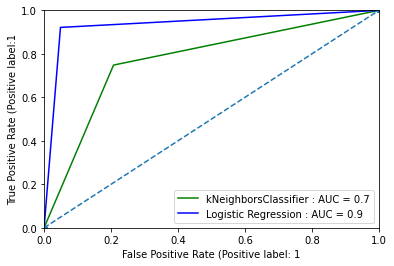

In [8]:
single_train = df.iloc[:4000, :]
single_test = df.iloc[4000:5000, :]


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(single_train.iloc[:, :-1], single_train.iloc[:, -1])
y_pred = neigh.predict(single_test.iloc[:, :-1])
fpr, tpr, threshold = roc_curve(single_test.iloc[:, -1], y_pred)

lr = LogisticRegression(max_iter=1000)
lr.fit(single_train.iloc[:, :-1], single_train.iloc[:,-1])
predicted_classes = lr.predict(single_test.iloc[:, :-1])

plt.plot(fpr, tpr,  color="green", label="kNeighborsClassifier : AUC = 0.7")
fpr, tpr, threshold = roc_curve(single_test.iloc[:, -1], predicted_classes)
plt.plot(fpr, tpr, color="blue", label="Logistic Regression : AUC = 0.9")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Positive label:1')
plt.xlabel('False Positive Rate (Positive label: 1')
plt.show()

In [9]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.      
    # m-> number of training examples
    # n-> number of features 
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape
    w = np.zeros((n,1))
    b = 0
    y = y.reshape(m,1)
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

model1fold = LogisticRegression(max_iter=1000)
w, b, l = train(fold1_train.iloc[:, :-1], fold1_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold1_test.iloc[:, :-1])
print("1.Accuracy"+str(accuracy(np.array(fold1_test.iloc[:, -1]),predicted_c)))
print("1.Precision: " + str(precision_score(fold1_test.iloc[:, -1], predicted_c, average='binary')))
print("1.Recall: " + str(recall_score(fold1_test.iloc[:, -1], predicted_c, average='binary')))

w, b, l = train(fold2_train.iloc[:, :-1], fold2_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold2_test.iloc[:, :-1])
print("2.Accuracy"+str(accuracy(np.array(fold2_test.iloc[:, -1]),predicted_c)))
print("2.Precision: " + str(precision_score(fold2_test.iloc[:, -1], predicted_c, average='binary')))
print("2.Recall: " + str(recall_score(fold2_test.iloc[:, -1], predicted_c, average='binary')))

w, b, l = train(fold3_train.iloc[:, :-1], fold3_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold3_test.iloc[:, :-1])
print("3.Accuracy"+str(accuracy(np.array(fold3_test.iloc[:, -1]),predicted_c)))
print("3.Precision: " + str(precision_score(fold3_test.iloc[:, -1], predicted_c, average='binary')))
print("3.Recall: " + str(recall_score(fold3_test.iloc[:, -1], predicted_c, average='binary')))

w, b, l = train(fold4_train.iloc[:, :-1], fold4_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold4_test.iloc[:, :-1])
print("4.Accuracy"+str(accuracy(np.array(fold4_test.iloc[:, -1]),predicted_c)))
print("4.Precision: " + str(precision_score(fold4_test.iloc[:, -1], predicted_c, average='binary')))
print("4.Recall: " + str(recall_score(fold4_test.iloc[:, -1], predicted_c, average='binary')))

w, b, l = train(fold5_train.iloc[:, :-1], fold5_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold5_test.iloc[:, :-1])
print("5.Accuracy"+str(accuracy(np.array(fold5_test.iloc[:, -1]),predicted_c)))
print("5.Precision: " + str(precision_score(fold5_test.iloc[:, -1], predicted_c, average='binary')))
print("5.Recall: " + str(recall_score(fold5_test.iloc[:, -1], predicted_c, average='binary')))

<ipython-input-9-619155750e45>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-9-619155750e45>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-9-619155750e45>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


1.Accuracy0.90975
1.Precision: 0.8539823008849557
1.Recall: 0.8311800172265289


<ipython-input-9-619155750e45>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-9-619155750e45>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-9-619155750e45>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


2.Accuracy0.9325
2.Precision: 0.8756388415672913
2.Recall: 0.8923611111111112


<ipython-input-9-619155750e45>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-9-619155750e45>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-9-619155750e45>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


3.Accuracy0.918
3.Precision: 0.8252730109204368
3.Recall: 0.9104991394148021


<ipython-input-9-619155750e45>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-9-619155750e45>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-9-619155750e45>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


4.Accuracy0.9215
4.Precision: 0.8599656357388317
4.Recall: 0.8689236111111112


<ipython-input-9-619155750e45>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-9-619155750e45>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-9-619155750e45>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


5.Accuracy0.9283333333333333
5.Precision: 0.872491145218418
5.Recall: 0.8735224586288416
